In [62]:
import numpy as np
import matplotlib.pyplot as plt
doplot=2
%matplotlib nbagg
import logging
%load_ext autoreload
%autoreload 2
#logging.basicConfig(level=logging.DEBUG)
log = logging.getLogger('JMK')
log.setLevel(logging.DEBUG)
log.info('Hi')
log.debug('BooWho')
def symclim(pcm):
    cl = pcm.get_clim()
    m = np.max(np.abs(cl))
    pcm.set_clim([-m,m])


INFO:JMK:Hi
DEBUG:JMK:BooWho


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
c1=3.72e-3*2663/np.pi
omega = np.pi*2./3600./12.4
f=1e-4

k = np.sqrt((omega**2-f**2)/c1**2)
print c1,np.pi*2./k/1e3

k = np.pi*2./200.e3
c1 = np.sqrt((omega**2-f**2)/k**2)
H = c1*np.pi/3.72e-3
print H,c1

3.1532923241 200.024157314
2662.67838421 3.15291149473


3010 3010


<IPython.core.display.Javascript object>


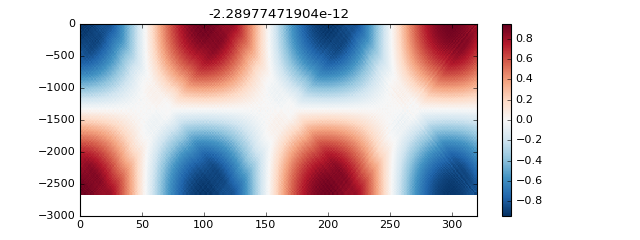

In [81]:
import SolveReflOuter as sr
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(12,figsize=(8,3))
fig.clf()
if 1:
    I =320
    ax=fig.add_subplot(1,1,1)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2662.67
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]

    x,z,H,P,debug=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=xx,H=hh,J=140,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    #                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
#fig.canvas.manager.show()



## Test resolution

3010 3010


<IPython.core.display.Javascript object>


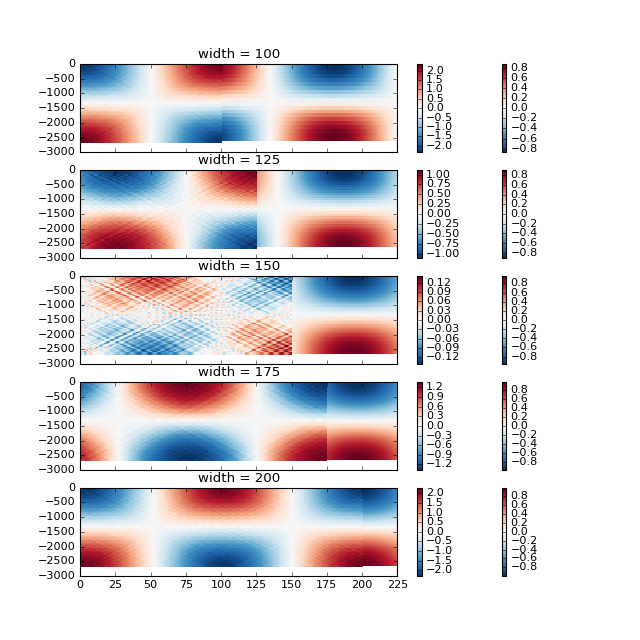

<IPython.core.display.Javascript object>


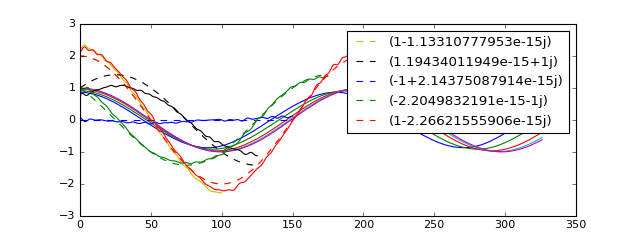

20
30
60
120
240


In [83]:
import SolveRefl as sr
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(13,figsize=(8,8))
fig2=plt.figure(14,figsize=(8,3))
ax2=fig2.add_subplot(1,1,1)
Js = [20,30,60,120,240]
for nn,J in enumerate(Js):
    print J
    I =326
    ax=fig.add_subplot(5,1,nn+1)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2662.67
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]

    x,z,H,P,debug=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=xx,H=hh,J=J,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    #                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title('vert levels = %d'%J)
    ax.set_xticks(np.arange(0,500.,25.))
    if nn<4:
        ax.set_xticklabels('')
    ax.set_xlim([0.,np.max(x)/1e3])
    
    ax2.plot(x/1e3,P[0,:]-offset)
#fig.canvas.manager.show()


So, from the above, we see the effect of too few vertical levels.  The theoretical wavelength is 200 km, but the lower resolution versions give a shorter wavelength.  The same effect can be found by considering vertical modes from the `vertmodes.vertModesP` (below).  The p solver tends to underestimate $c$ and hence the wavelength of internal waves $\lambda$.  The effect is to make the transmitting BC poor because the incoming waves are out of phase with what the reflecting BC expects.  

In [9]:
from vertmodes import vertModesP,vertModes

k = np.pi*2./200e3
c1 = np.sqrt((omega**2-f**2)/k**2)
print c1
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
Js = [20,40,80,160,320,640,1280]
for nn,J in enumerate(Js):
    zmid = np.linspace(0.,2662.67,J+1)
    dz = np.median(np.diff(zmid))
    zmid = zmid[:-1]+dz/2.
    N2 = np.interp(zmid,z0,Nsq0)
    # P solver
    psi,phi,ce,zphi=vertModesP(N2,dz)
    # Wsolver
    psi,phi,ceW,zphi=vertModes(N2,dz)
    print('%04d %06.3f %06.3f %06.3f %06.3f'%( J,ce[0],ce[0]/c1*100.,ceW[0],ceW[0]/c1*100.))

3.15291149473
0020 02.686 85.204 03.156 100.103
0040 02.918 92.536 03.154 100.025
0080 03.035 96.257 03.153 100.006
0160 03.094 98.126 03.153 100.001
0320 03.123 99.063 03.153 100.000
0640 03.138 99.531 03.153 100.000
1280 03.146 99.765 03.153 100.000


/Users/jklymak/python/lib/vertmodes.py:178: RuntimeWarning: invalid value encountered in sqrt
  ce = 1./np.sqrt(ce)


## Test reflecting wall...

3010 3010


<IPython.core.display.Javascript object>


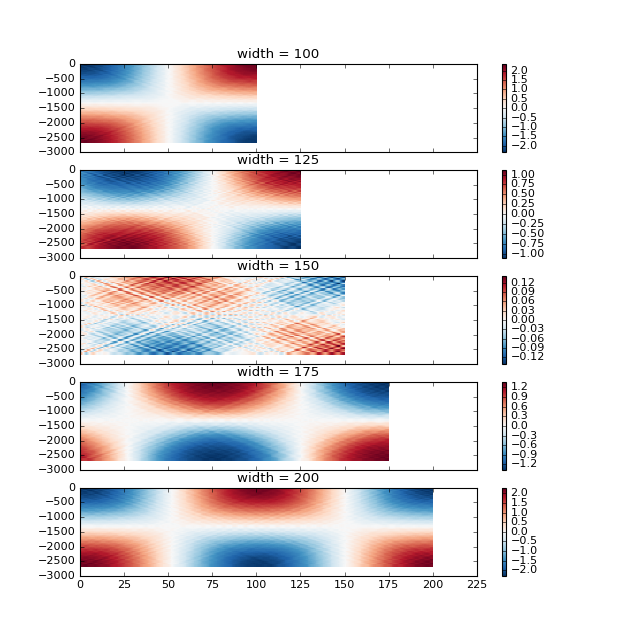

<IPython.core.display.Javascript object>


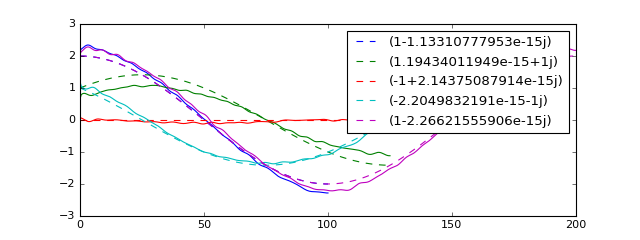

3.14159265359
(1-1.13310777953e-15j)
3.92699081699
(1.19434011949e-15+1j)
4.71238898038
(-1+2.14375087914e-15j)
5.49778714378
(-2.2049832191e-15-1j)
6.28318530718
(1-2.26621555906e-15j)


In [85]:
import SolveReflOuter as sr
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(15,figsize=(8,8))
fig2=plt.figure(16,figsize=(8,3))
ax2=fig2.add_subplot(1,1,1)
Js = [60]
Is = np.linspace(100.,200.,5)
for nn,I in enumerate(Is):
    J=Js[0]
    
    ax=fig.add_subplot(5,1,nn+1)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2662.67
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]

    x,z,H,P,debug=sr.SolveRefl(k=0.,omega=omega,f=f,wall=True,x=xx,H=hh,J=J,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    #                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title('width = %d'%I)
    ax.set_xticks(np.arange(0,500.,25.))
    if nn<4:
        ax.set_xticklabels('')
    ax.set_xlim([0.,225.])
    
    # get the reflected amplitude:
    k0 = np.pi*2./200.e3
    print k0*x[-1]
    A = np.exp(1j*k0*2.*x[-1])
    print A
    
    pp,=ax2.plot(x/1e3,P[0,:]-offset)
    ax2.plot(x/1e3,np.real(np.exp(1j*k0*x)+A*np.exp(-1j*k0*x)),'--',color=pp.get_color(),label=A)
ax2.legend()
#fig.canvas.manager.show()


## Test versus Qiang's solution.

This won't be perfect, as he solves for a velocity potential.


In [90]:
import SolveRefl as sr
I=256; J=128*2;
omega=1.45e-4; f=1.06e-4; # tidal frequency and Coriolis parameter
Nsq=0.01**2; # buoyance

x=np.linspace(0e3,80e3,I); dx=x[1]-x[0];
 
# geometry/topography
H=225-75*np.tanh(0.1e-3*(x-30e3)); #H=300+x*0;
if 0:
    H = 0*H+225.
    ind = np.where((x>30.e3)&(x<50.e3))[0]
    H[ind] = np.linspace(225,225-75,len(ind))
    H[ind[-1]:]=225-75
#H=225.0 - 50.0*np.exp(-((x-40.e3)/1.e3)**2)

z0 = np.linspace(0,np.max(H),500)
Nsq0 = z0*0.+Nsq
x,z,H,P,debug=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=x,H=H,J=J,z0=z0,Nsq0=Nsq0,)
  

<IPython.core.display.Javascript object>


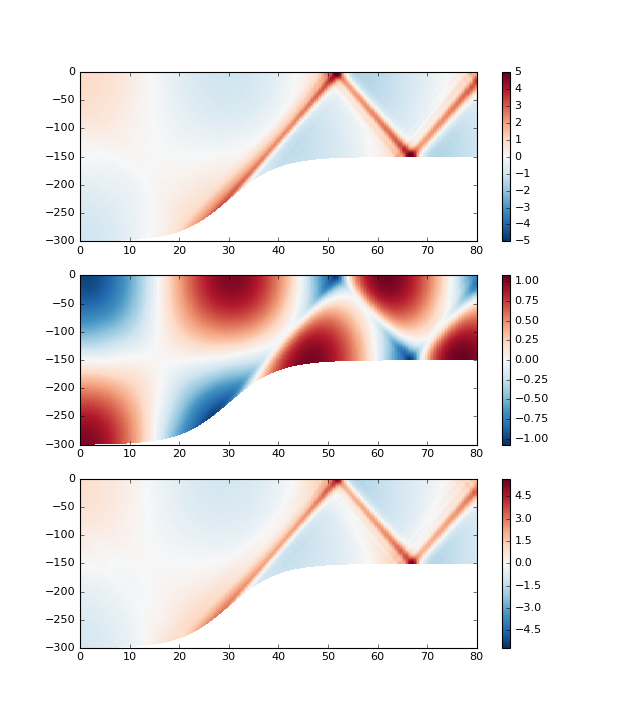

(-15957106.3714+211454736.662j)
0.00390625
[ 1.   2.   2.5  2. ]
(256,)


In [92]:
  
fig,axs=plt.subplots(3,1,figsize=(8,9))
#P=np.real(P);
offset=np.mean(P[:,0])
print offset
dz=z[1]-z[0]
print dz
print np.gradient([1.,2.,5.,7.])
dx = x[1]-x[0]
gP = np.gradient(P)
Hx = np.gradient(H,x[1]-x[0])

print np.shape(z)
dpDX = gP[1]/dx - z[:,np.newaxis]/H*Hx*gP[0]/dz
U = -np.real(1j*omega*dpDX)/(f**2-omega**2)
U = U-np.mean(U[:,0])
U = U/np.mean(U[-14:,0])
#for ind  in range(np.shape(U)[0]):
#    U[ind,:]=np.convolve(U[ind,:],np.ones(6)/6.,mode='same')
ax = axs[0]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],U,rasterized=True,cmap='RdBu_r')
symclim(pcm)
pcm.set_clim(np.array([-1.,1.])*5.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)

ax = axs[1]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],P-np.mean(P[:,0]),rasterized=True,cmap='RdBu_r')
symclim(pcm)
#pcm.set_clim(np.array([-1.,1.])/10.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)

from matfile import loadmatbunch
cw = loadmatbunch('cw1981_Fig4.mat')
ax=axs[2]
u = cw['u']-np.mean(cw['u'][:,0])
u = u/np.mean(u[-4:,0])
pcm=ax.pcolormesh(cw['xxx']/1e3,cw['zzz'],u,cmap='RdBu_r')
symclim(pcm)
fig.colorbar(pcm,ax=ax)

## Chuang and Wang '81 Fig 4 b

<IPython.core.display.Javascript object>


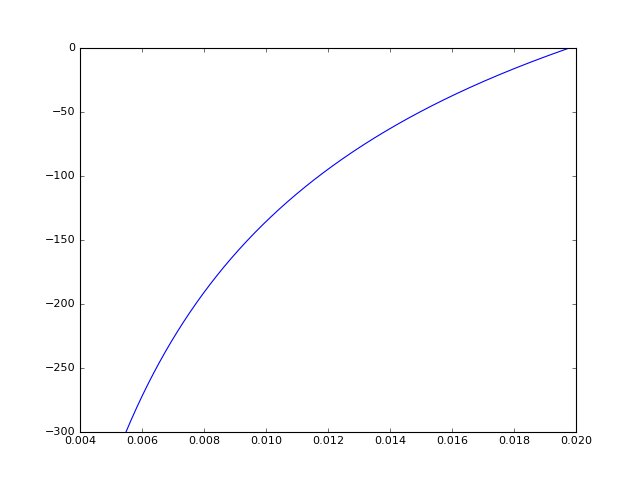

In [11]:
I=162; J=350;
omega=1.45e-4; f=1.06e-4; # tidal frequency and Coriolis parameter
Nsq=0.01**2; # buoyance

x=np.linspace(0e3,160e3,I); dx=x[1]-x[0];
 
# geometry/topography
H=225-75*np.tanh(0.1e-3*(x-70e3)); #H=300+x*0;
if 0:
    H = 0*H+225.
    ind = np.where((x>30.e3)&(x<50.e3))[0]
    H[ind] = np.linspace(225,225-75,len(ind))
    H[ind[-1]:]=225-75
#H=225.0 - 50.0*np.exp(-((x-40.e3)/1.e3)**2)
C0 = 5e-3
C1 = -3e-3

z0 = np.linspace(-np.max(H),0.,500)
Nsq0 = omega**2 + (omega**2-f**2)/(C0**2*(1+C1*z0)**4)
fig,ax=plt.subplots()
ax.plot(np.sqrt(Nsq0),z0)

In [12]:
import SolveRefl as sr
x,z,H,P,debug=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=x,H=H,J=J,z0=z0,Nsq0=Nsq0,)  

<IPython.core.display.Javascript object>


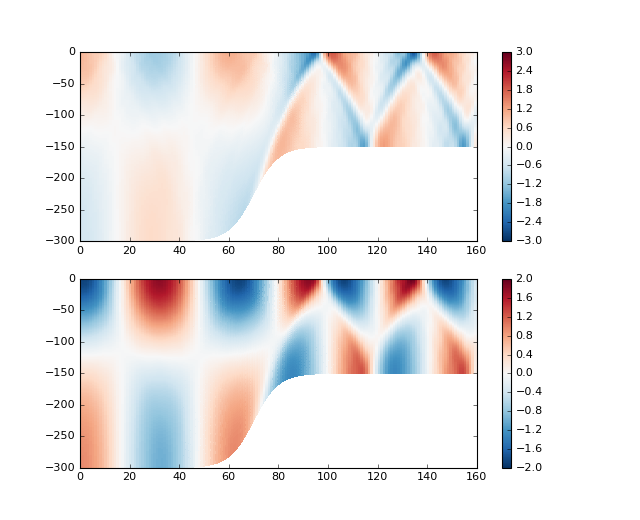

(-130393885.982-251951676.108j)
0.00285714285714
[ 1.   2.   2.5  2. ]
(350,)


In [13]:
fig,axs=plt.subplots(2,1,figsize=(8,6.5))
#P=np.real(P);
offset=np.mean(P[:,0])
print offset
dz=z[1]-z[0]
print dz
print np.gradient([1.,2.,5.,7.])
dx = x[1]-x[0]
gP = np.gradient(P)
Hx = np.gradient(H,x[1]-x[0])

print np.shape(z)
dpDX = gP[1]/dx - z[:,np.newaxis]/H*Hx*gP[0]/dz
U = -(1j*omega*dpDX)/(f**2-omega**2)
U = U-np.mean(U[:,0])
U = U/np.mean(U[-14:,0])
#for ind  in range(np.shape(U)[0]):
#    U[ind,:]=np.convolve(U[ind,:],np.ones(6)/6.,mode='same')
ax = axs[0]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(U),rasterized=True,cmap='RdBu_r')
#symclim(pcm)
pcm.set_clim(np.array([-1,1.])*3.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)

ax = axs[1]
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],P-np.mean(P[:,0]),rasterized=True,cmap='RdBu_r')
symclim(pcm)
pcm.set_clim(np.array([-1.,1.])*2.)
#                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
fig.colorbar(pcm,ax=ax)


## Dale and Sherwin 04

This tests whether changing $k_y$ gets the right resonance curves.  Constant stratification

<IPython.core.display.Javascript object>


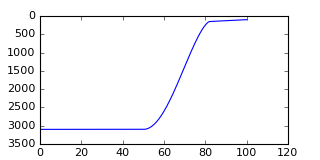

In [94]:
# This topography is from Dale et al 01, but I assume they used the same...

I=200
x = np.linspace(0,100.1e3,I)
#xmod = x/1e3
xmod=x*1.
L = x[-1]
W=32.e3
xs=18.e3
hc = 100.
hs = 150.
h0 = 3100.
hmatch = 40.
xmatch = 13e3

h = h0+0.*x
inds = (x>L-xs-W) 
h[inds]= hs + (h0-hs)*( 0.5*(1-np.cos(np.pi/W*(x[inds]-L+xs))) )**0.75
ind = np.argmin(h)
h[ind:]=np.linspace(h[ind],hc,len(h)-ind)

fig,ax=plt.subplots(figsize=(4,2))
ax.plot(x/1e3,h)
ax.set_ylim(3500,0)
Nsq0 = 2.7e-5*np.exp(z0/500.)
z0=np.arange(-3500.,0.,1.)
f=9.3e-5
omega = np.pi*2./12.4/3600.

xx=x

In [95]:
z0 = np.linspace(-3400,0.,200.)
Nsq0 = 0*z0+ 2.72e-3**2
f = 9.3e-5

In [96]:
J = 40
omega = 1.25*f


In [101]:
# scan for solutions
import sys,time
import SolveRefl as sr
#from future import __print__
oms = np.linspace(0.,2.,102)
oms = oms[1:]
ks = np.linspace(0.,2.,200)
J = 40
res = np.zeros((len(oms),len(ks)))
for jj,om in enumerate(oms):
    if np.abs(om-1.)>0.001:
        sys.stdout.write('%4.2f'%om)
        for ii,k in enumerate(ks):
            sys.stdout.write('.')
    #        try:
            x,z,H,P,debug=sr.SolveRefl(k=k*1e-4,omega=om*f,f=f,wall=True,x=x,H=h,J=J,z0=z0,Nsq0=Nsq0,Incoming=False)
                # P = P - np.mean(P[:,0])
            res[jj,ii] = np.sum(np.sum(np.abs(P)[:,x>30e3],axis=0)*H[x>30e3])
        
        sys.stdout.write('\r')
    else:
        print 'skipping %3.5f: too close to 1'%om

In [107]:
dalesherwin = dict()
dalesherwin['res']=res
dalesherwin['ks']=ks
dalesherwin['oms']=oms
with open('dalesherwin','wb') as f:
    pickle.dump(dalesherwin,f)

<IPython.core.display.Javascript object>


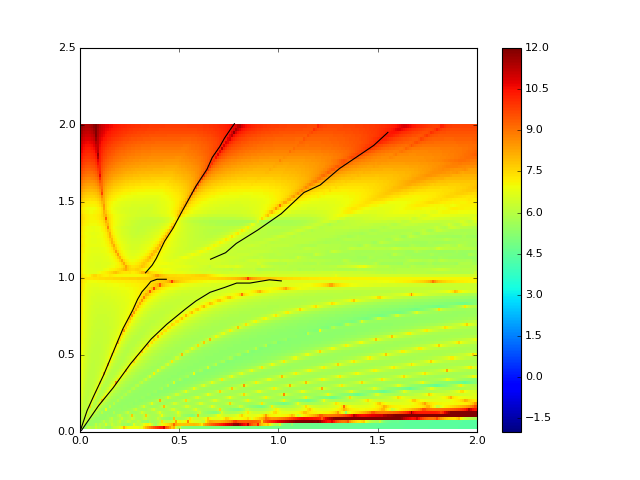

In [104]:
fig,ax = plt.subplots()
import cPickle as pickle
td = ['Mode1Sub.pickle','Mode1Super.pickle','Mode2Sub.pickle','Mode2Super.pickle']
for fn in td:
    lin = pickle.load(open(fn,'rb'))
    ax.plot(lin['x'],lin['y'],'k')
pcm=ax.pcolormesh(ks,oms,np.log10(res),rasterized=True)
pcm.set_clim([-2.,12])
fig.colorbar(pcm,ax=ax)

<IPython.core.display.Javascript object>


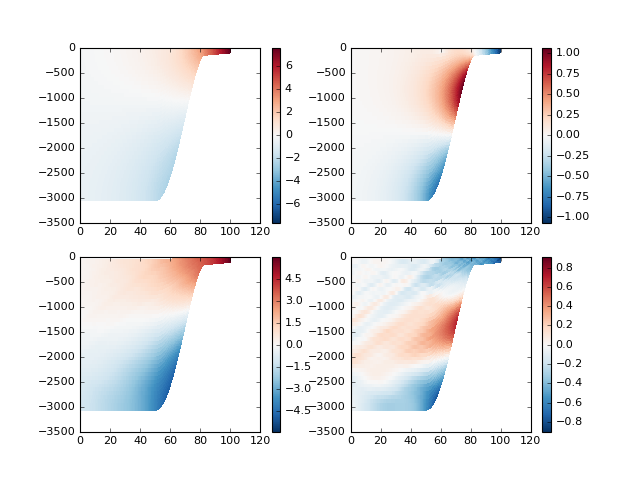

0.75 0.267
0.75 0.538
1.25 0.41
1.25 0.7


In [105]:
nn=0
fig,axs=plt.subplots(2,2);axs=axs.flatten()

for om,k in zip([0.75,0.75,1.25,1.25],[0.267,0.538,0.41,0.70]):
    print om,k
    x,z,H,P,debug=sr.SolveRefl(k=k*1e-4,omega=om*f-1j*1.e-6,f=f,wall=True,x=x,H=h,J=40,z0=z0,Nsq0=Nsq0,Incoming=False)
    #P = P - np.mean(P[:,0])
    ax = axs[nn]
    nn+=1
    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P),rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    fig.colorbar(pcm,ax=ax)
    #pcm.set_clim(np.array([-1.,1.])*1e3)
    

## Dale et al 01

<IPython.core.display.Javascript object>


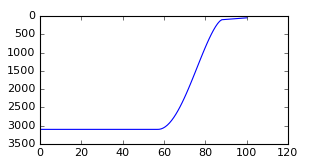

In [108]:
I=100
x = np.linspace(0,100.1e3,I)
#xmod = x/1e3
xmod=x*1.
L = x[-1]
W=31.e3
xs=12.e3
hc = 50.
hs = 100.
h0 = 3100.
hmatch = 40.
xmatch = 13e3

h = h0+0.*x
inds = (x>L-xs-W) 
h[inds]= hs + (h0-hs)*( 0.5*(1-np.cos(np.pi/W*(x[inds]-L+xs))) )**0.75
ind = np.argmin(h)
h[ind:]=np.linspace(h[ind],hc,len(h)-ind)

fig,ax=plt.subplots(figsize=(4,2))
ax.plot(x/1e3,h)
ax.set_ylim(3500,0)
z0=np.arange(-3500.,0.,1.)
Nsq0 = 2.7e-5*np.exp(z0/500.)
f=9.3e-5
omega = np.pi*2./12.4/3600.

xx=x

In [109]:
# scan for solutions
import sys,time
import SolveRefl as sr
#from future import __print__
oms = np.linspace(0.,2.,102)
oms = oms[1:]
ks = np.linspace(0.,2.,200)
J = 40
res = np.zeros((len(oms),len(ks)))
for jj,om in enumerate(oms):
    if np.abs(om-1.)>0.001:
        sys.stdout.write('%4.2f'%om)
        for ii,k in enumerate(ks):
            sys.stdout.write('.')
    #        try:
            x,z,H,P,debug=sr.SolveRefl(k=k*1e-4,omega=om*f,f=f,wall=True,x=x,H=h,J=J,z0=z0,Nsq0=Nsq0,Incoming=False)
                # P = P - np.mean(P[:,0])
            res[jj,ii] = np.sum(np.sum(np.abs(P)[:,x>30e3],axis=0)*H[x>30e3])
        
        sys.stdout.write('\r')
    else:
        print 'skipping %3.5f: too close to 1'%om

In [113]:
dalesherwin = dict()
dalesherwin['res']=res
dalesherwin['ks']=ks
dalesherwin['oms']=oms
with open('daleetal.pickle','wb') as f:
    pickle.dump(dalesherwin,f)

<IPython.core.display.Javascript object>


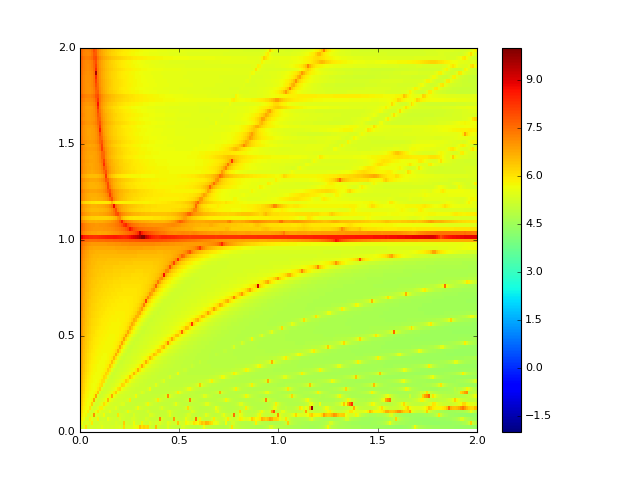

In [114]:
fig,ax = plt.subplots()
import cPickle as pickle
pcm=ax.pcolormesh(ks,oms,np.log10(res),rasterized=True)
pcm.set_clim([-2.,10])
fig.colorbar(pcm,ax=ax)

This looks quite similar to Dale et al 2001, so this seem sucessful. moreso even than the constant stratification, perhaps because we don't know the exact geometry of the constant stratification case.